<a href="https://colab.research.google.com/github/sbhattac/ai-workshop/blob/master/LinReg/Linear_Regression_HousePrices_AI_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Make Predictions using Linear Regression



## Learning Objectives

### Student should be able to:

### Content
* Describe linear regression as machine learning algorithm   
* Intepret the results of a linear regression model   
* Use the model for predictions   
* Assess the linear regression model   

### Process
* Data preparation: Loading, training and test data
* Data exploration: Construct and interpret scatter plot graphs, data preparation
* Fit a model (model selection and training)
* Model prediction performance assessment
* Visual model diagnostic

## Regression as ML Algorithm
Regression from a Machine Learning Perspective   
**Scientific mindset**: Modeling to understand the data generation process   
**Engineering mindset**: Modeling to make accurate predict predictions   
Regression as Machine Learning falls under the Engineering mindset.   

# Assigning Roles and Responsibilities within each group



In [ ]:
#@title (RUN CELL upon completion)


#@markdown ---
#@markdown ### Enter Instructor Name:
Instructor_Name = "" #@param {type:"string"}
#@markdown 1. Introduces activities. Assigns roles to participants.
#@markdown 2. Responds for help or clarification request.
#@markdown 3. Collects the Jupiter notebooks from Recorder and Evaluator
#@markdown ---

#@markdown ### Enter Facilitator Name:
Facilitator_Name = "" #@param {type:"string"} 
#@markdown ### Enter Backup Facilitator Name:
Backup_Facilitator_Name = "" #@param {type:"string"} 
#@markdown 1.	Reads aloud each question and ask for volunteers to answer. If there is no volunteer then he/she starts the discussion and asks one participant after another for comments, solutions, answers, or clarifications.  When majority participants agree then she/he asks Recorder to record the answer. Also coordinates discussion about the code execution and the output like any other question.   
#@markdown 2.	Involves each participant equally in the discussions.    
#@markdown 3.	Turn the coordinating role to Evaluator after finishing each activity.  
#@markdown ---

#@markdown ### Enter Recorder Name:
Recorder_Name = "" #@param {type:"string"}
#@markdown ### Enter Backup Recorder Name:
Backup_Recorder_Name = "" #@param {type:"string"}  
#@markdown 1.	Coordinates Zoom screen access. Displays his/her screen when asking questions. Gives access to screen sharing as requested    
#@markdown 2.	Records all answers  for each question  inside the Jupiter Notebook   
#@markdown 3. Use "Run all" in menu "Runtime" and then "Save" Jupiter Workbook with all answers and results.
#@markdown 4. Submit Jupiter notebook with all answers and results of the running code.
#@markdown ---

#@markdown ### Enter Evaluator Name:
Evaluator_Name = "" #@param {type:"string"}
#@markdown ### Enter Backup Evaluator Name:
Backup_Evaluator_Name = "" #@param {type:"string"} 
#@markdown 1.	Keeps track of time for each designated Activity.   
#@markdown 2.	After each activity leads the discussion about material and collects feedback in the form of the table below.   
#@markdown 3. Submit Jupiter notebook with all comments and results of discussion at the end of each activity.  
#@markdown ---

#@markdown ### Enter Participant names
Participant_4_Name = "" #@param {type:"string"} 
Participant_5_Name = "" #@param {type:"string"}
Participant_6_Name = "" #@param {type:"string"}
Participant_7_Name = "" #@param {type:"string"}
Participant_8_Name = "" #@param {type:"string"}

#@markdown 1.	Participates actively in team work to answer all questions.
#@markdown 2.	Executes the code and shares the comments.
#@markdown ---


#Download necessary data files into temporary cloud machine:

In [ ]:
#@title Download the data

import urllib
import os
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/sbhattac/ai-workshop/master/LinReg/"
for filename in ("HousePrices.csv", "HousePrices_test.csv", "HousePrices_train.csv", "fig3.png"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + filename
    urllib.request.urlretrieve(url, filename)


## Motivating Problem:

You are working for the goverment agency that is responsible for relocation of several homeless families to available housing. You want to be sure that you are using our tax money to buy the properties fair to the seller but not allow to overcharge the government account. Find the estimated value for each house on the market.

# Activity 1. Visual Exploration
Example: What if you want to understand the relationship between property price and their structural characteristics like area, zone, category, age, floor, rooms, baths, garage, elevator, heating storage.   

Review the scatter plots below: 

In [ ]:
#@title Hit play button to see Figure 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

filename = "HousePrices.csv"
HousePricesArea = pd.read_csv(filename)

plt.suptitle('Modeling Price using Area')
plt.scatter(HousePricesArea['area'], HousePricesArea['price'], color='black', s=3)
plt.grid(True, color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True,which='minor',color='#999999', linestyle='-', alpha=0.2)
plt.title("Figure 1")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
plt.xlabel("Area (square meters)")  
plt.ylabel("Price (USD)") 

plt.show()

#### Key Questions
Inspect **Figure 1**:

In [ ]:
#@title (RUN CELL upon completion)

#@markdown **1.** What does each axis describe?
short_answer = "" #@param {type:"string"}

#@markdown **2.** Price is plotted versus which variable?
short_answer = "" #@param {type:"string"}

#@markdown **3.** How would you describe the graph and its points in words to someone who has no visual on the graph?
short_answer = "" #@param {type:"string"}

#@markdown **4.** Is there a trend in the scatter plot? Explain it.
short_answer = "" #@param {type:"string"}

#@markdown **5.** Is it feasible to assume the trend, if any, appears to follow more or less a straight line?
short_answer = "" #@param {type:"string"}

#@markdown **6.** Argue if a straight line can be used to predict the property price given its area.
short_answer = "" #@param {type:"string"}

#@markdown **7.** Try to predict the property price given its area is 150 sq.m. Around what price?
short_answer = "" #@param {type:"string"}

Run the cell below.

In [ ]:
#@title Review two competing models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

filename = "HousePrices.csv"
HousePricesArea = pd.read_csv(filename)


fig, axes = plt.subplots(1, 2)
fig.set_size_inches(6, 5)

fig.suptitle('Modeling Price using Area')
axes[0].scatter(HousePricesArea['area'], HousePricesArea['price'], color='black', s=3)
axes[0].grid(True, color='#666666', linestyle='-')
axes[0].minorticks_on()
axes[0].grid(True,which='minor',color='#999999', linestyle='-', alpha=0.2)
axes[0].set_title("Figure 2-A")
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)

axes[1].scatter(HousePricesArea['area'], HousePricesArea['price'], color='black', s=3)
axes[1].grid(True, color='#666666', linestyle='-')
axes[1].minorticks_on()
axes[1].grid(True,which='minor',color='#999999', linestyle='-', alpha=0.2)
axes[1].set_title("Figure 2-B")
axes[1].axhline(y=280000, label="Average Price", color='blue', linewidth=1)

plt.legend()

for ax in axes.flat:
    ax.set(xlabel='Area (square meters)', ylabel='Price (USD)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    
x_vals = np.array(axes[0].get_xlim())
y_vals =  2942.32486893 * x_vals + 20025.59183124936
axes[0].plot(x_vals, y_vals, linewidth=1, color='blue')

axes[0].set_xlim(axes[1].get_xlim())
axes[0].set_ylim(axes[1].get_ylim())
axes[0].ticklabel_format(useMathText=True)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
#@title (RUN upon completion)


#@markdown **8.** Which model will predict more accurately the property price given its area, e.g. 150 sq.m.? Explain why?
short_answer = "" #@param {type:"string"}

#@markdown **9.** Discuss for what property area the linear model (**Fig. 2-A**) will make decent prediction(s)? Specify range for the area.
short_answer = "" #@param {type:"string"}

#@markdown **10.** Similarly, discuss for what property area the base model (**Fig. 2-B**) will make decent prediction(s)? Specify range for the area.
short_answer = "" #@param {type:"string"}

#@markdown **11.** Discuss with you group why modeling association among variables is important?
short_answer = "" #@param {type:"string"}


# Task (1) Evaluation 

In [ ]:
#@title #Team Work Evaluation (RUN upon completion)

#@markdown 1.	How much time was required for completion of Activity 1?
activity1_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity1_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How could the team work and learn more effectively?
activity1_evaluation3 = "" #@param {type:"string"} 
#@markdown 4.	How many participants thought the problems were too simple (trivial)? 
activity1_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were at the proper level of difficulty?	
activity1_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	How many participants thought the problems were too hard?
activity1_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	Was help needed? Where?
activity1_evaluation7 = "" #@param {type:"string"}
#@markdown 8.	Does the team have any suggestions about how Activity 1 could be improved? If so, how? 
activity1_evaluation8 = "" #@param {type:"string"} 

# Activity 2: Data Preparation and Exploratory Data Analysis


Run the cell with the code below 

In [ ]:
#@title Importing python libraries
import pandas as pd  #imports the "pandas" library
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.formula.api as sm

### A) Loading Data: Reading csv files into Tables (Pandas Dataframes) 


You want to get all information in tabular form from the file "HousePrices_train.csv"


**1.** Anything **tabular** is arranged in a table, with rows and columns. 

________________________

**2.** **Tidy Data** is a data set that are arranged as table such that each variable is a column and each observation (or case) is a row.

________________________


Using existing function in the `panda` library we can read `cvs` files, run the given code:

In [ ]:
#@title Reading data from CSV format

filename = "HousePrices_train.csv"  # training set data file
usecols=['price', 'area']
HousePricesArea = pd.read_csv(filename, usecols=usecols)
HousePricesArea.head(10)

**3.** You can see the dimension of the data by running the code:

In [ ]:
#@title RUN CELL 
print("Number of rows and columns")
HousePricesArea.shape

In [ ]:
#@title (RUN upon completion)

#@markdown We will refer shortly to this as `HousePricesArea` data.

#@markdown **5.** What column (**feature/variable**) should we use for prediction?  
short_answer = "" #@param {type:"string"}

#@markdown **6.** Why do we call `price` the “**response/dependent**” variable?
short_answer = "" #@param {type:"string"}


**7.** Try to explain to someone in your group what the quantity $\bar x$ is.

$$\bar{x}=\frac{x_1 + x_2 + … + x_n}{n}=\sum_{i=1}^n \frac{x_i}{n}$$


In [ ]:
#@title (RUN CELL upon completion)

short_answer = "" #@param {type:"string"

**8.** Try to explain to someone in your group what the quantity $s^2$ measures for the sample data.

$$s^2=\sum_{i=1}^n  \frac{(x_i-\bar x)^2}{n-1}$$

In [ ]:
#@title (RUN CELL upon completion)

short_answer = "" #@param {type:"string"}

**9.** What a square root of $s^2$ would represent for the sample data?


$$s = \sqrt{s^2}$$ 

In [ ]:
#@title (RUN CELL upon completion)

short_answer = "" #@param {type:"string"}

### B) Concepts Clarification 

In [ ]:
#@markdown RUN CELL upon completion

#@markdown **10.** What is a graph? 

short_answer = "" #@param {type:"string"}

#@markdown Consider that Every data graphics can be understood in terms of four basic elements: **visual cues**, **coordinate system**, **scale**, and **context**.

### C) Dessecting Data Graphics   
Consider the graph below 


![Modeling price with area](https://drive.google.com/uc?export=view&id=1wPgRCoN4newsjshpQjpCfDPcI0YoYi5K)

In [ ]:
#@title (RUN upon completion)

#@markdown **11.** Within your group discuss which of the following **Visual cues**, are present on the graph: 

#@markdown * Position (numerical) where in relation to other things?
#@markdown * Length (numerical) how big (in one dimension)?
#@markdown * Angle (numerical) how wide? parallel to something else?
#@markdown * Direction (numerical) at what slope? In a time series, going up or down?
#@markdown * Shape (categorical) belonging to which group?
#@markdown * Area (numerical) how big (in two dimensions)?
#@markdown * Volume (numerical) how big (in three dimensions)?
#@markdown * Shade (either) to what extent? how severely?
#@markdown * Color

short_answer = "" #@param {type:"string"}

#@markdown **12.** Discuss which of type of **Coordinate systems**: 

#@markdown * Cartesian - rectangular coordinate system with two perpendicular axes.

#@markdown * Polar - The radial analog of the Cartesian system with points identified by their radius `ρ` and angle `θ`.

#@markdown * Geographic - This is the increasingly important system in which we have locations on the curved surface of the Earth, but we are trying to represent these locations in a flat two-dimensional plane. 

short_answer = "" #@param {type:"string"}

#@markdown * **13.** Discuss what of type of **Scale** is used to present data values

#@markdown * Numeric - numeric quantity is most commonly set on a linear, logarithmic, or percentage scale. 

#@markdown * Categorical - a categorical variable may have no ordering 

#@markdown * Time Time - a numeric quantity that has some special properties.

short_answer = "" #@param {type:"string"}


#@markdown * **14.** Discuss which of type of Context.

short_answer = "" #@param {type:"string"}

### D) Run the given code:

In [ ]:
#@title Graph display
plt.figure(figsize=(7,5))
plt.title('Modeling Price using Area')
plt.scatter(HousePricesArea['area'], HousePricesArea['price'], color='black', s=3)
plt.grid(True, color='#999999', linestyle='-', alpha=.2)
plt.xlabel("Area (square meters)")
plt.ylabel('Price (USD)')
plt.show()

### E) Questions About the Housing Data (based on visualized data)



In [ ]:
#@title (RUN upon completion)

#@markdown **11.** Is there a relationship/association between price and area? Discuss with your group based on scatter plot display.

short_answer = "" #@param {type:"string" 

#@markdown **12.** How strong is that relationship, if any? What can be used to quantify the strength of the relationship, if any?

short_answer = "" #@param {type:"string"

#@markdown **13.** Can prices be predicted? Do you think based on the data you can build a reliable model to predict house price of a property with area of 400 m2? 

#@markodown Discuss why.

short_answer = "" #@param {type:"string"

### F) Graphical Interpretations of Linear Regression

We can estimate prices manually by trying to draw a "best fit" line on this graph.

In [ ]:
#@title (RUN upon completion)

#@markdown **14.** How many parameters describe the line?

short_answer = "" #@param {type:"string"}

#@markdown **15.** Generally a line can be described by an equation y = a + b*x

#@markdown What do we call these parameters? 

short_answer = "" #@param {type:"string"}

Let us play with values of `a` and `b` until we manually guess the "best" `a` and `b` to approximate house prices.  
Run the cells below to use the sliders to provide values for a and b that will get you get close to "best" line.

In [ ]:
#@title Definitions of functions
from IPython.display import display                               
from ipywidgets import interactive, fixed

def average(x):
    ave=0
    if x:
        ave = sum(x)/len(x)
    return(ave)


def plot_figure(x_list, y_list, a, b, a_true=None, b_true=None, x_ave=None, y_ave=None):
    
    plt.figure(figsize=(7,5))
    plt.title('Modeling Price using Area')
    plt.scatter(x_list, y_list, color='black', s=3)
    plt.grid(True, color='#999999', linestyle='-', alpha=.2)
    plt.xlabel("Area (square meters)")
    plt.ylabel('Price (USD)')
    plt.ylim(min(y_list)-10, max(y_list)+10)
    plt.xlim(min(x_list)-10, max(x_list)+10)
    
    x_vals = np.array(plt.xlim())
    if x_ave is not None and y_ave is not None:
        y_vals = a*(x_vals-x_ave) + y_ave
    else:
        y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, linewidth=1, color='blue')
    
    if a_true is not None and b_true is not None:
        y_true = a_true*x_vals + b_true # these will be replaced with the estimates from the train set estimators 
        plt.plot(x_vals, y_true, linewidth=1, color='red') # can we display this once the blue line guess is made by clicking, e.g. show on click
        a_error = abs(a_true - a)/a_true *100
        b_error = abs(b_true - b)/b_true * 100

        print("Slope error is {}%".format(int(a_error)))
        if int(a_error) < 10:
            print("Congratulations! Your slope error is under 10%")
        print("Intercept error is {}%".format(int(b_error)))
        if int(b_error) < 10:
            print("Congratulations! Your intercept error is under 10%")
    
    plt.show()
    return(a,b)

In [ ]:
#@title Play with the sliders
x_list = list(HousePricesArea['area'])
y_list = list(HousePricesArea['price'])

inter = interactive(plot_figure, 
                    x_list=fixed(x_list), 
                    y_list=fixed(y_list),
                    a=(1000, 4000),
                    b=(10000, 60000),
                    a_true=fixed(None),
                    b_true=fixed(None),
                    x_ave=fixed(None),
                    y_ave=fixed(None))

display(inter)

**Note:** Allow the line to fix its position based on your choice, you may experience certain lag, before you make your choice for the best `a` and `b`. Run the code below to confirm your choices.

In [ ]:
#@title You selected
student_slope_intercept = inter.result
print("Slope and intercept selected:")
print(student_slope_intercept)


**16.** What values `a` and `b` are the best?
___________________________

Run the code below to see how close you actually are to the best line.

In [ ]:
#@title The truth (RUN CELL)
tempvar1,tempvar2 = plot_figure(x_list, y_list,
                a=student_slope_intercept[0],
                b=student_slope_intercept[1],
                a_true=2942.32486893,   # 
                b_true=20025.59183124936) # 

**17.** Let us assume that somehow the estimates of `a` and `b` for the line of best fit are known. Using these values how close the predicted price value for the first house (the first row) is to the true value?

We have to use equation:

$y = a + b* x$

What is the value of `x` for the first house? Run the code to see the first row in the data `HousePricesArea`?
____________________

In [ ]:
#@title first observation in the data
HousePricesArea.head(1)

Run the code below to see actual and predicted price.

In [ ]:
#@title predicted vs actual price
x = HousePricesArea.loc[0,'area']
b = 20025.59183124936 # intercept
a = 2942.32486893   # slope
y = a*x + b

print("The predicted price for the house using our 'best-fit' line is", y)
print("The actual price for the house is", HousePricesArea.loc[0,'price'] )

In [ ]:
#@title (RUN upon completion)

#@markdown **18.** What is the approximate difference between the predicted and actual price? Is it big compared to the standard deviation for the price variable for the sample? 

short_answer = "" #@param {type:"string"}

#@markdown **19.** Run the code below to see the standard deviation for the price in the `HousePricesArea` data.

In [ ]:
#@title price standard deviation 
sd_price = np.std(HousePricesArea['price'])
print("The standard deviation of the price in the sample is", sd_price)


# Task Evaluation (2)

In [ ]:
#@title #Team Work Evaluation (RUN upon completion)

#@markdown 1.	How much time was required for completion of Activity 1?
activity1_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity1_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How could the team work and learn more effectively?
activity1_evaluation3 = "" #@param {type:"string"} 
#@markdown 4.	How many participants thought the problems were too simple (trivial)? 
activity1_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were at the proper level of difficulty?	
activity1_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	How many participants thought the problems were too hard?
activity1_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	Was help needed? Where?
activity1_evaluation7 = "" #@param {type:"string"}
#@markdown 8.	Does the team have any suggestions about how Activity 1 could be improved? If so, how? 
activity1_evaluation8 = "" #@param {type:"string"} 


# Activity 3: Linear Regression using one predictor/feature 

### A) The model 

Simple Linear Regression is a **machine learning** (ML) algorithm based on **supervised learning**. In general, regression analysis models an outcome (the **response** variable) as a function of one or more **explanatory** variables (or **predictors**). 


**Simple Linear Regression** performs the task of modeling/predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$E(y) = \beta_0 + \beta_1x$ 

or 

$y = \beta_0 + \beta_1x + \epsilon$

What does each term represent?

- $y$ is the response

- $x$ is the feature

- $\beta_0$ is the intercept

- $\beta_1$ is the coefficient for x

- $\epsilon$ is the random error term

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. 

For this activity we will use the Housing Data from Activity/Task 1: **HousePricesArea**

### B) Concepts Clarification 

**1.** Discuss with your group: What does it mean **"learn"** from bivariate data the best line? 

________________________________________________
A: In order your group to create a linear model, you must **"learn"** the values of slope and intercept. Once you've learned these coefficients, we can use the model to predict property price! Learn means to estimate.


Through ordinary least squares (**OLS**)* method of estimation the regression coefficients can be obtained for the data in explicit form by **minimizing*** the 

$$Q=\sum \epsilon_i^2 = \sum_{i=1}^n (Y_i - (\beta_0 + \beta_1 x_i))^2$$

where $Y_i$ is the observed value of the response variable for the $i$th trial corresponding to $x_i$ value of the predictor.

$$\epsilon_i=Y_i-\hat{Y_i}$$ is the difference between the observed and predicted value for the response.

Using calculus one can obtain the **estimated** parameters, from the data:


$$\hat \beta_1 = \frac{\sum_{i=1}^n(x_i-\bar x)(Y_i-\bar Y)}{\sum_{i=1}^n (x_i- \bar x)^2}$$


$$\hat\beta_0= \bar Y - \hat \beta_1 \bar x$$

the predicted (estimated) errors called **residuals** are defined as

$$\hat \epsilon_i= Y_i - \hat Y_i  (observed - expected)$$


**2.** Would you be satisfied if you need to manually find these estimations, especially given the available data is relatively large?

________________________________________________

**3.** Would it be efficient to repeat these estimations if you slightly tweak the data, say remove one or two unusual observations?

________________________________________________

**4.** Try to geometrically interpret what the method ordinary least squares (**OLS**) estimation is doing?

________________________________________________


Among many functions that help to do linear regression is  scikit-learn library.
We are going to use it now.

**5.** Try again to visually derive the best line by adjusting the slope of a line passing through the average value of the predictor and response in the data. Let see how close you can get.

In [ ]:
#@title (RUN upon completion)

Briefly_summarise = "" #@param {type:"string"}

In [ ]:
#@title Try one more time to estimate the slope
x_ave = average(x_list) 
y_ave = average(y_list)

inter = interactive(plot_figure, 
                    x_list=fixed(x_list), 
                    y_list=fixed(y_list),
                    a=(1000, 10000),
                    b=fixed(None),
                    a_true=fixed(None),
                    b_true=fixed(None),
                    x_ave=fixed(x_ave),
                    
                    y_ave=fixed(y_ave))

display(inter)


# still need to add the OLS print out as the slider moves
# do we give awards here?

In [ ]:
#@title Click to confirm your choice
student_slope_intercept = inter.result
slope = student_slope_intercept[0]
print(student_slope_intercept[0])

Run the code to see how close was your estimation.

In [ ]:
#@title Slope estimation result
a_error = abs(a - slope)/a *100
print("Slope error is {}%".format(int(a_error)))
if int(a_error) < 10: 
  print("Congratulations! Your slope error is under 10%")

To an extent you or your group may have been successful in the visual estimation approach but you may agree that the chances you get the best line are slim. Is it time to harness the machine and make it learn?

### C) Machine Learning Preparation

The fundamental goal of **ML** is to generalize beyond the data instances used to train a model. Model evaluation to estimate the quality of its pattern generalization for data the model has not been trained on is essential. 

In general future instances have unknown target values and you cannot check the accuracy of your predictions for future instances, you need to use some of the data that already available as a proxy for future data. 


#### Validation Set Approach - Splitting the Data into Training and Testing Data

**6.** Discuss within your group which approach is preferred to assess model accuracy: evaluation of the model using the same data the model "learned" from or unseen data? Explain your reasoning.


**7.** If you decide to split the original data to form **training** and **testing** set for model fitting and evaluation which one you would allocate more data to? Why?

A: Increasing the training data always adds information and should improve the fit. 

**8.** Run the code below to read the file `HousePrices_test.csv` and we will refer to it as `HousePricesArea_test` data.

In [ ]:
#@title (RUN upon completion)

Briefly_summarise = "" #@param {type:"string"}

In [ ]:
#@title Read one more data - The test data

filename = "HousePrices_test.csv"  # test set data file
usecols=['price', 'area']
HousePricesArea_test = pd.read_csv(filename, usecols=usecols)
HousePricesArea_test.head(10)


**9.** Before hand we performed random split to the original data: near **70%** for model training and **30%** for testing your model's predictive performance. Run the code to see how many records are in each set.

In [ ]:
#@title Train/Test data - number of observations
print("Training set records", len(HousePricesArea))

print("Testing set records", len(HousePricesArea_test))

In [ ]:
#@title (RUN upon completion)

#@markdown **10.** Complete the sentence by reading the output of the code in the cell above:

#@markdown Now the training set has ..... observations, and the testing set has ..... observation. 

short_answer = "" #@param {type:"string"}


### D) Fitting linear regression model using the training set - It is time to do machine learning

**11.** Run the code in the cell below to fit linear regression model to the `HousePricesArea` data.

In [ ]:
#@title Fit the model using the train data
# define formula with response and predictor
fmla='price ~ area' 

# create a fitted model assign using OLS estimation from statistical models
lin_reg = sm.ols(formula=fmla, data=HousePricesArea).fit()

# print the coefficients
lin_reg.params

# more details about the fitted linnear regression model
#lin_reg.summary()


In [ ]:
#@title (RUN upon completion)

#@markdown **12.** Which one of the output values corresponds to the slope of the best line? 

short_answer = "" #@param {type:"string"}

#@markdown **13.** Run the code cells below and adjust the slider to observe the effect of **outliers** on the best line. 


#@markdown **Note:** An outlier is a data point that do not seem to fit the general pattern in the data. 

In [ ]:
#@title Definition of a function
from random import randint

def create_single_outlier():
 
    price = randint(1500000,2500000)
    area = randint(180,200)
    return(price, area)

def create_outlier_table(num):
    temptable = pd.DataFrame()
    pricelist = []
    arealist = []
    for i in range(num):
        price, area = create_single_outlier()
        pricelist.append(price)
        arealist.append(area)
    temptable['price'] = pricelist
    temptable['area'] = arealist
    return(temptable)

def predict_line(table):
    predictor=np.array(table['area']).reshape(-1,1)
    response=table['price']
    lm = LinearRegression()
    lm.fit(predictor, response)
    return(lm.coef_, lm.intercept_)

def plot_figure_outliers(num):
    tempdf = create_outlier_table(num)
    HousePricesArea_outliers = pd.concat([HousePricesArea, tempdf], ignore_index=True)

    a_orig, b_orig = predict_line(HousePricesArea)
    plt.scatter(HousePricesArea['area'], HousePricesArea['price'], s=3, label='Data witout outliers', color="black")
    x_vals = np.arange(0, 200, 1)
    y_vals_orig = a_orig * x_vals + b_orig
    plt.plot(x_vals, y_vals_orig, linewidth=1, label="'best-fit' line without outliers", color="blue") # can we display this once the blue line guess is made by clicking, e.g. show on click
     
    a, b = predict_line(HousePricesArea_outliers)

    plt.scatter(tempdf['area'], tempdf['price'], s=10, label="Outlier Data", color="orange")
   
    y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, linewidth=1, label="'best-fit' line with outliers", color="orange") # can we display this once the blue line guess is made by clicking, e.g. show on click
    plt.ylim(0, 2500000)
    plt.xlim(50, 200)
    plt.legend(loc=2)

**14.** Discuss with your group possible implications **outliers** may have on the best line. 

In [ ]:
#@title Be cautious of unusual data 
inter = interactive(plot_figure_outliers, 
                num=(0,5))

display(inter)

### E) Using the Model for Prediction

If we express the regression model with the line equation, coefficients are rounded to the nearest whole integer: 

$$price = 20026 + 2942*area$$


**15.** How could you interpret the `area` coefficient ($\beta_1$)?

__________________________________________________________

- A "unit" increase in area is **associated with** a 2942 "unit" increase in price.
- Or more clearly: An additional 1 sq.m of property is **associated with** an price increase of 2942 dollars.

**16.** Is there meaningful interpretation for the intercept coefficient, ($\beta_0$)? 

____________________________

**17.** Can you use this linear equation to predict the price of a house given its `area=120` sq.m, if the same housing market conditions apply?

____________________________________________________________________________________________

**18.** If you review again the scatterplot data for the training set, you can see the range for the area is approximately on the interval (specify):

______________________________________________________________

**19.** Prediction within the range of values in the data set used for model-fitting is known informally as **interpolation**. Prediction outside this range of the data is known as **extrapolation**. 

What is appropriate classification of the predicted price for an `area=120` sq.m. in this context?

_______________________________________________________________



In [ ]:
#@title (RUN upon completion)

Briefly_summarise = "" #@param {type:"string"}


Run the code below using the equation of the line

In [ ]:
#@title New prediction
# create df to hold the values of the area for which prediction will be made
X_new = pd.DataFrame({'area':[120]})
X_new.head()

lin_reg.predict(X_new)


**20.** Run the code in the cell below to see summary for predictor variable `area` in the `HousePricesArea` data

In [ ]:
#@title Some summary statistics for the area variable
HousePricesArea['area'].describe()

**21.** Discuss possible implications if you try to predict the price for a really large property, area= 300 sq.m.? 
Note that for the sample data `area` ranges from 53 sq.m to 200 sq.m.

**22.** To complete this activity run the code that produces the predicted and residual values for the `HousePricesArea` data:

In [ ]:
#@title RUN CELL - predicted and residual values
# adding the predicted and residual values to the data frame HousePricesArea
pred=lin_reg.fittedvalues

resid=lin_reg.resid

HousePricesArea['predicted']=pred

HousePricesArea['residuals']=resid

HousePricesArea.head(10)



**23.** Please discuss how the vertical line segment shown on the graph below relate to the values in the table shown for expanded `HousePricesArea` data. Rund the two cells below.

In [ ]:
#@title Plotting function definition
# plot for residuals
def plot_residuals(x_list,y_list, showPlot=False):
    fig = plt.figure()
    fig.set_size_inches(10, 8)
    x = np.array(x_list).reshape(-1,1)
    lm = LinearRegression()
    lm.fit(x, y_list)

    x_vals = np.arange(min(x_list), max(x_list), 1)
    y_vals = lm.coef_ * x_vals + lm.intercept_
  
    residuals = []
    y_min = []
    y_max = []
    y_pred = []

    for i in range(len(x_list)):
        y = (x_list[i])*(lm.coef_[0]) + lm.intercept_
        y_pred.append(y)
        res = y - y_list[i]
        residuals.append(res)
        if y > y_list[i]:
            y_max.append(y)
            y_min.append(y_list[i])
        else:
            y_max.append(y_list[i])
            y_min.append(y)
    if showPlot:
        plt.grid(True, color='#999999', linestyle='-', alpha=.2)
        plt.plot(x_vals, y_vals, color="blue")
        plt.scatter(x_list, y_list, s=5, color="black")
        plt.scatter(x_list, y_pred, s=10, facecolors='none', edgecolors="red", marker='o')
        plt.vlines(x_list, y_min, y_max, linewidth=.5)
    return(residuals)

In [ ]:
#@title Residual plot
residuals = plot_residuals(list(HousePricesArea['area']), list(HousePricesArea['price']), showPlot=True)


# Task (3) Evaluation

In [ ]:
#@title #Team Work Evaluation (RUN upon completion)

#@markdown 1.	How much time was required for completion of Activity 1?
activity1_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity1_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How could the team work and learn more effectively?
activity1_evaluation3 = "" #@param {type:"string"} 
#@markdown 4.	How many participants thought the problems were too simple (trivial)? 
activity1_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were at the proper level of difficulty?	
activity1_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	How many participants thought the problems were too hard?
activity1_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	Was help needed? Where?
activity1_evaluation7 = "" #@param {type:"string"}
#@markdown 8.	Does the team have any suggestions about how Activity 1 could be improved? If so, how? 
activity1_evaluation8 = "" #@param {type:"string"} 




# Activity 4: Model Performance Assessment and Diagnostic



### 0) Prerequisites :  Concepts and Data


#### Consider the ANOVA Approach to Regression

The analysis of variance approach (**ANOVA**) is based on partitioning the sums of squares and the degrees of freedom associated with the response variable `Y`. The total deviation, $Y_i-\bar Y$ can be decomposed into two components:

* The deviation of the fitted value $\hat Y_i$ around the mean $\bar Y$ and

* The deviation of the observation $Y_i$ around the regression line.

$$Y_i-\bar Y = \hat Y_i-\bar Y + Y_i-\hat Y_i$$

One then can show the total sum of squares can be expressed as:

$$\sum_{i=1}^n (Y_i-\bar Y)^2 = \sum_{i=1}^n (\hat Y_i-\bar Y)^2 + \sum_{i=1}^n (Y_i-\hat Y_i)^2$$

The equation above frequently is expressed as:

$$SST = SSR + SSE$$

* $SST$ - Total sum of squares


* $SSR (SSM)$ - Regression sum of squares (Sum of squares attributed to the model)


* $SSE$ - Error sum of squares


* $R^2=1- \frac{SSE}{SST}=\frac{SSM}{SST}$ is called **Coefficient of Determination** 


* **Mean Square Error** $(MSE)$ - If $n$ **predictions** are generated from a sample of $n$ data points on all variables, and $Y_i$ are the observed values of the variable being predicted, with $\hat{Y_i}$ being the predicted values (e.g. as OLS fit), for $i=1 2, ..., n$ then the within-sample `MSE` of the predictor is computed as 


$$MSE=\frac{1}{n}\sum (Y_i -\hat{Y_i})^2$$


* **Mean Square Prediction Error** $(MSPE)$ is the MSE evaluated with a data points that were not used in estimating the model, e.g. a held back test set or new data. MSPE is frequently used to assess predictive performance of a candidate model.


* $RMSE$ - $\sqrt{MSE}$


* $RMSPE$ - $\sqrt{MSPE}$
 
 ___________________________________________________


* file: "HousePrices_test.csv" - previously retained for testing purposes


### A) Motivating Micro Problem

You want to incorporate quantitative measure(s) to assess model predictive performance in order to select the best model among candidate models that describe the Housing Data.

### B) Reading the Test Data

Using again the existing function in the `panda` library we can read cvs files, run the given code:

In [ ]:
#@title Test data - the unseen data
#the data was loaded earlier, shown here for demo 

filename = "HousePrices_test.csv"  # test set data file
usecols=['price', 'area']
HousePricesArea_test = pd.read_csv(filename, usecols=usecols)
HousePricesArea_test.head(10)



### C) How Well Does the Model Fit the data?


**1.** Each member of the group should take turn at describing what $R^2$ mean in everyday language.

A: R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.


**2.** Discuss how the partition of the total sum of squares can be used to locate good fitting model? What does relatively big $SSE$ means?

__________________________________________________


**3.** Discuss why the null model has $R^2=1- \frac{SSE}{SST}=0$ or $SSE=SST$.

__________________________________________________

**4.** For any regression model, what is the range of values for $R^2$?

A: 0 to 1 (perfect fit)

__________________________________________________


**5.** Review the 4 possible scenarios given below, all of the have the same $R^2=0.67$ and discuss why $R^2$ should be used with caution and never as sole criterion for determining the best model. Source: Wikipedia
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/800px-Anscombe%27s_quartet_3.svg.png" width="400" height="300">
 
 
**6.** Run the code below to see $R^2$ for the best model derived in **Activity 3**. Discuss with you group if $R^2$ alone can be a good measure of the model fit. Keep in mind the scenarios in the previous question.

In [ ]:
#@title R-square for the model 
lin_reg.rsquared

**7.** Evaluating $R^2$ using the test set (unseen data) may result in negative value, can you argue why? 


__________________________________________________



In [ ]:
#@title (RUN upon completion)

Briefly_summarise = "" #@param {type:"string"}

### D) How Well Does the Model predict?

**8.** Run the code below, the graph display shows the observed vs predicted price value for the train model data, `HousePricesArea`. The line $y=x$ is used as reference line. What would it mean if majority of the point were above the line? Would that be a good fit?

In [ ]:
#@title Compare observed vs predicted prices
# graph Observed vs Predicted price values for the training data
# pred = lin_reg.fittedvalues # previously defined
price = HousePricesArea['price']

plt.figure(figsize=(8,5))
p=plt.scatter(x=pred,y=price)
xmin=min(pred)
xmax = max(pred)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=True, scaley=True)

plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Fig. 1: Observed vs Predicted Values (train data)")
plt.grid(True)
plt.show()

**9.** Run the code below, the graph display shows the observed vs predicted price value for the test set data, `HousePricesArea_test`. The line $y=x$ is used as reference line. How the model generalize to out-of-sample data? Do you think it provides good fit? Discuss why if yes/no.


In [ ]:
#@title Using the **test data**
# graph Observed vs Predicted price values for the testing set data

# price from the HousePricesArea_test data
price_test = HousePricesArea_test['price']

# create df to hold the values of the area for which prediction will be made
X_new = HousePricesArea_test['area']
X_new.head()

# predicted price values for test set
pred_test = lin_reg.predict(X_new)



plt.figure(figsize=(8,5))
p=plt.scatter(x=pred_test,y=price_test)
xmin=min(pred_test)
xmax = max(pred_test)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=True, scaley=True)

plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Fig. 2: Observed vs Predicted Values (test set)")
plt.grid(True)
plt.show()


### E) RMSE - Measure of Model Error and Model Fit Indicator.

In [ ]:
#@title (RUN upon completion)

#@markdown **10.** How would you describe the **MSE** and **RMSE** in residual context?

short_answer = "" #@param {type:"string"}

#@markdown **11.** Speaking of the value of a model in generally one would be more concern with the overall accuracy and precision, not how successfully it explains the variation in a particular data set. What models will provide better accuracy, models with smaller or bigger MSE? Discuss with you group.

short_answer = "" #@param {type:"string"}

#@markdown **12.** Considering **Fig. 1** and **Fig. 2**, compare the MSE (on train set) and MSPE (on test set) for the model fitted in Activity 3. Which one appears to be bigger? Explain why.

short_answer = "" #@param {type:"string"}
 
#@markdown **13.** First check the **RMSE**, $\sqrt{MSE}$, for your model, using the training set, by running the code.

short_answer = "" #@param {type:"string"}

In [ ]:
#@title RMSE 
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse=mean_squared_error(HousePricesArea['price'],lin_reg.fittedvalues)
rmse=sqrt(mse)
rmse


In [ ]:
#@title (RUN upon completion)

#@markdown **14.** Is the RMSE big or small? It probably depends. Discuss what could you use to assess how big the RMSE is.

short_answer = "" #@param {type:"string"}

**15.** Run the code below to evaluate the ratio of `RMSE` and `standard deviation` of the `price` variable for the `HousePricesData`. Discuss if this gives you insight about the model fit.

In [ ]:
#@title Ratio RMSE/St.Dev
print("Ratio RMSE/St.Dev", rmse/sd_price)

In [ ]:
#@title (RUN upon completion)

#@markdown **16.** Discuss if **RMSE** is a more helpful indicator of a model's fit than is $R^2$.

short_answer = "" #@param {type:"string"}

**17.** Run the code below to evaluate the ratio of `RMSPE` and `standard deviation` of the `price` variable for the unseen data in `HousePricesData_test`. Discuss what significant deviation from the ratio on the train data would mean for the model predictive ability.

In [ ]:
#@title Now using the **test** data
mspe=mean_squared_error(HousePricesArea_test['price'],pred_test)
rmspe=sqrt(mspe)
print("Root Mean Square Prediction Error(test set)", rmspe)



In [ ]:
#@title Now Ratio RMSE/St.Dev for **test** data
sd_price_test = np.std(HousePricesArea_test['price'])
print("The standard deviation of the price in the test set is", sd_price_test)
print("Ratio RMSPE/St.Dev", rmspe/sd_price_test)

**18.** What if the `MSPE` for the unseen data is not commensurate with the `MSE` on the train data, e.g. it is significantly bigger - is that a model that generalize well? What could have cause such significant difference?



In [ ]:
#@title (RUN upon completion)

Briefly_summarise = "" #@param {type:"string"}

### F) Diagnostic: The **LINE** assumptions through visual analytics methods

The linear regression model is built under certain conditions. These conditions are sometimes called the **"LINE"** assumptions. All but the independence assumption can be assessed using diagnostic plots.

Any inferences from the model are only valid if the following assumptions hold:

* **I. Linearity**: The functional form of the relationship between the predictor(s) and the response follows a linear combination of regression parameters that are correctly specified (assumption can be verified by bivariate graphical displays).


* **II. Independence**: The errors ($\epsilon$) are uncorrelated and they do not follow a pattern (perhaps over time or within clusters of subjects)? 

**Note:** We are not covering this assumption in this notebook as it cannot be assessed through dynamic visualization.

* **III. Normality of residuals**: Do the residuals follow a distribution that is approximately **normal** (symmetric bell shape)? This assumption can be verified using univariate displays.

* **IV. Equal variance of residuals**: Is the variance in the residuals constant across the explanatory variables (**homoscedastic** errors)? Or does the variance in the residuals depend on the value of one or more of the explanatory variables (heteroscedastic errors)? This assumption can be verified using residual diagnostics.





In [ ]:
#@title (RUN upon completion)

#@markdown **19.** What does it mean if a fitted model has majority of the residual positive? What if majority are negative?

short_answer = "" #@param {type:"string"}

#@markdown **20.** If a model provides good fit, what percentage of positive (negative) residuals are expected? Discuss with your group.
short_answer = "" #@param {type:"string"}

#@markdown **21.** Review the histogram below displaying the residual distribution - discuss whether normality of residuals is reasonable (assumption **III.**).
short_answer = "" #@param {type:"string"}

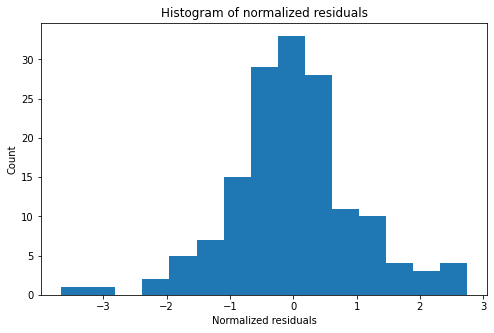

In [ ]:
#@title Residuals distribution
plt.figure(figsize=(8,5))
plt.hist(lin_reg.resid_pearson,bins=15)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.title("Histogram of normalized residuals")
plt.show()

In [ ]:
#@title (RUN upon completion

#@markdown **22.** Review the scatter plot below displaying the residual distribution vs area - discuss with your group how the reference line $y=0$ can be used to assess model fit and the equal variance of residuals assumption (assumtion **IV.**)
 
short_answer = "" #@param {type:"string"}

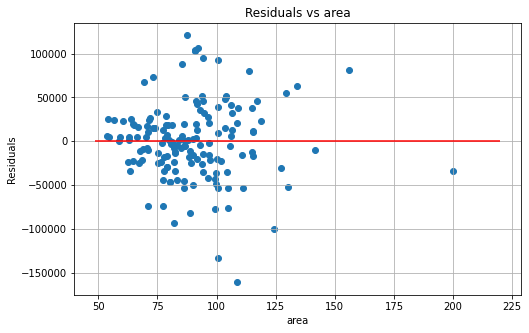

In [ ]:
#@title Residual vs area
# graph residuals vs predictor (area)
# lin_reg.fittedvalues
predictor = HousePricesArea['area']

plt.figure(figsize=(8,5))
p=plt.scatter(x=predictor,y=lin_reg.resid)
xmin=min(predictor)
xmax = max(predictor)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red')
plt.xlabel("area")
plt.ylabel("Residuals")
plt.title("Residuals vs area")
plt.grid(True)
plt.show()

In [ ]:
#@title (RUN upon completion

#@markdown **23.** Review the scatter plot below displaying the residual distribution vs area - discuss with your group how the reference line $y=0$ can be used to assess model fit and the equal variance of residuals assumption (assumption **IV.**).
 
short_answer = "" #@param {type:"string"}


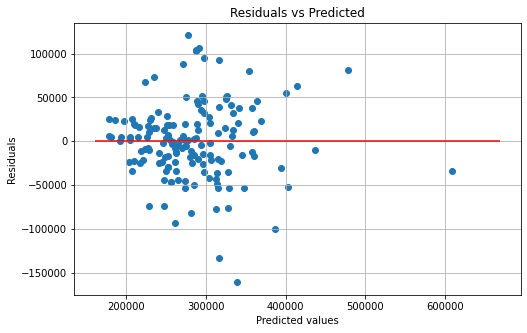

In [ ]:
#@title Residuals vs predicted values 
# graph residuals vs predicted values 
plt.figure(figsize=(8,5))
p=plt.scatter(x=lin_reg.fittedvalues,y=lin_reg.resid)
xmin=min(lin_reg.fittedvalues)
xmax = max(lin_reg.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


# Task (4) Evaluation

In [ ]:
#@title #Team Work Evaluation
#@markdown 1.	How much time was required for completion of Activity 1?
activity1_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity1_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How could the team work and learn more effectively?
activity1_evaluation3 = "" #@param {type:"string"} 
#@markdown 4.	How many participants thought the problems were too simple (trivial)? 
activity1_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were at the proper level of difficulty?	
activity1_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	How many participants thought the problems were too hard?
activity1_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	Was help needed? Where?
activity1_evaluation7 = "" #@param {type:"string"}
#@markdown 8.	Does the team have any suggestions about how Activity 1 could be improved? If so, how? 
activity1_evaluation8 = "" #@param {type:"string"}  	




# Activity 5: Multiple Linear Regression Model for the Housing Data


You want to build multiple linear regression model that can better predict prices using a set of quantitative predictors, chosen by you. To measure your success compare the `RMSPE` (`MSPE`) of the model with the one for the simple linear regression model from **Activity 3**. 

How do you decide which features to include in a linear model? Here's one idea: 

Try different models and see if the MSPE goes up/down when you use validation set approach.

### A) Concepts Clarification: Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$E(y) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$ 

or 

$y = \beta_0 + \beta_1x + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

Each 𝑥 represents a different feature, and each feature has its own coefficient. 

### B)  Full Housing Data Discription

A data frame with 219 observations on the following 15 variables

* `price` (the market total price (in Euros) of the apartment including garage(s) and storage room(s))

* `area` (the total living area of the apartment in square meters)

* `zone` (a factor indicating the neighborhood where the apartment is located with levels `Z11, Z21, Z31, Z32, Z34, Z35, Z36, Z37, Z38, Z41, Z42, Z43, Z44, Z45, Z46, Z47, Z48, Z49, Z52, Z53, Z56, Z61, and Z62`)

* `category` (a factor indicating the condition of the apartment with levels `2A, 2B, 3A, 3B, 4A, 4B`, and `5A` ordered so that `2A` is the best and `5A` is the worst)

* `age` (age of the apartment in years)

* `floor` (floor on which the apartment is located)

* `rooms` (total number of rooms including bedrooms, dining room, and kitchen)

* `out` (a factor indicating the percent of the apartment exposed to the elements: The levels `E100, E75, E50, and E25`, correspond to complete exposure, `75`% exposure, `50`% exposure, and `25`% exposure, respectively.)

* `conservation` (is an ordered factor indicating the state of conservation of the apartment. The levels `1A, 2A, 2B, and 3A` are ordered from best to worst conservation.)

* `baths` (the number of bathrooms)

* `garage` (the number of garages)

* `elevator` (indicates the absence (0) or presence (1) of elevators.)

* `streetcategory` (an ordered factor from best to worst indicating the category of the street with levels `S2, S3, S4, and S5`)

* `heating` (a factor indicating the type of heating with levels `1A, 3A, 3B, and 4A` which correspond to: no heating, low-standard private heating, high-standard private heating, and central heating, respectively.)

* `storage` (the number of storage rooms outside of the apartment)

Data is divided into two sets one for training and one for testing a model. 

`HousePrices_train.csv` - 153 observation

`HousePrices_test.csv` - 66 observations

Run the code below to obtain the housing data information, for **only** quantitative variables, in the form of tables by reading the csv files. We exclude categorical predictor from this model building exercise.

### C)  Read Data - run the cell below

In [ ]:
#@title Read the Data
# read the data for more variables from the csv file
filename = "HousePrices_train.csv"  # train data file
usecols=['price', 'area', 'age', 'floor', 'rooms', 'baths', 'garage', 'elevator', 'storage']

# read training set data
print("Reading training data")
HousePricesArea2 = pd.read_csv(filename, usecols=usecols)
HousePricesArea2.head(10)



Training data is contained in `HousePricesArea2` table.

Run the code to read the **test** set.

In [ ]:
#@title Read the test data
# read the data for more variables from the csv file
filename = "HousePrices_test.csv"  # train data file
usecols=['price', 'area', 'age', 'floor', 'rooms', 'baths', 'garage', 'elevator', 'storage']

# read training set data
print("Reading training data")
HousePricesArea2_test = pd.read_csv(filename, usecols=usecols)
HousePricesArea2_test.head(10)


Testing set data is contained in `HousePricesArea2_test` table.

### D)  Examining Relationships among Regression Variables 

**1.** Discuss with you group how to pick features for multiple regression among the features in the data.


**2.** Consider the following: variability of the candidate features, the correlation of each of the features with the response, the correlation between the features. 

**3.** If a features has a constant value for all or the majority of observations, is a good candidate for predictor?


**4.** Run the code below to explore the correlation of each of the features with the response, the correlation between the features. 

'price', 'area', 'age', 'floor', 'rooms', 'baths', 'garage', 'elevator', 'storage'


In [ ]:
#@title Pairplot to visualy explore the relations
# visualize the relationship between the select features and the price using scatterplots
from seaborn import pairplot

pairplot(HousePricesArea2)


**5.** Specifically note the correlation of the `rooms` variable with `price` and `area`. Discuss if including `rooms` in a model which contains already `area` would bring new information. 



### F) Model Fitting

**6.** Specify formula for the multiple linear regression in the form, e.g:

`fmla='price ~ var1 + var2 + var3 + var4'` 

You can modify the 2nd line in the cell below by replacing, adding or removing the variables specified with you choice of variables.

In [ ]:
# define formula with response and predictor - you can later modify the lines below 
fmla='price ~ area + baths + elevator' 
fmla

**7.** Define a vector with you chosen predictors in the cell below, include single quatations around the names,e.g.:

In [ ]:
# define vector with the names of the chosen predictors - you can later modify the lines below 
pred_cols=['area', 'baths','elevator']

**8.** Fit multiple regression model using ghe `statsmodels` library functions by running the code:

In [ ]:
#@title Fit multiple regression model
# create a fitted model assign using OLS estimation from statistical models
lin_reg_m = sm.ols(formula=fmla, data=HousePricesArea2).fit()

# print the coefficients
lin_reg_m.params

# more details about the fitted linnear regression model
#lin_reg_m.summary()

**9.** Try to interpret the coefficients of the model for each variable included. Review the model $R^2$ by runnign the code below and see how it compares to $R^2=0.650$ of the simple linear regression model from **Activity 3**.


_________________________________________

In [ ]:
#@title R-squared
print("R-squared:", lin_reg_m.rsquared) 

### G) Model Predicting Ability (visually)

**10.** Run the code below, the graph dispay shows the observed vs predicted price value for the train data, `HousePricesArea2`. The line 𝑦=𝑥 is used as reference line. Discuss your model fit.

In [ ]:
#@title Observed vs Predicted price values for the train data
# graph Observed vs Predicted price values for the training data
pred = lin_reg_m.fittedvalues 
price = HousePricesArea2['price']

plt.figure(figsize=(8,5))
p=plt.scatter(x=pred,y=price)
xmin=min(pred)
xmax = max(pred)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=True, scaley=True)

plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Observed vs Predicted Values (train data)")
plt.grid(True)
plt.show()

**11.** Run the code below, the graph dispay shows the observed vs predicted price value for the test set data, `HousePricesArea2_test`. The line $y=x$ is used as reference line. How the model generalize to out-of-sample data? Do you think it provides good fit?

In [ ]:
#@title Observed vs Predicted price values for the test data
# graph Observed vs Predicted price values for the testing set data

# price from the HousePricesArea_test data
price_test = HousePricesArea2_test['price']

# create df to hold the values of the area for which prediction will be made
X_new = HousePricesArea2_test[pred_cols]
X_new.head()

# predicted price values for test set
pred_test = lin_reg_m.predict(X_new)



plt.figure(figsize=(8,5))
p=plt.scatter(x=pred_test,y=price_test)
xmin=min(pred_test)
xmax = max(pred_test)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=True, scaley=True)

plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Observed vs Predicted Values (test set)")
plt.grid(True)
plt.show()

### H) Model Predicting Ability using RMSPE

**12.** Run the code below to evaluate the ratio of RMSPE and standard deviation of the price variable for the unseen data in `HousePricesData2_test`. Discuss what significant deviation from the ratio on the train data would mean for the model predictive ability.

Record the RMSPE:

__________________________________

In [ ]:
#@title RMSPE
# MSE for the test set
mspe=mean_squared_error(HousePricesArea2_test['price'],pred_test)
rmspe=sqrt(mspe)
print("Root Mean Square Prediction Error(test set)", rmspe)

sd_price_test = np.std(HousePricesArea2_test['price'])
print("The standard deviation of the price in the test set is", sd_price_test)
print("Ratio RMSPE/St.Dev", rmspe/sd_price_test)

**13.** Compare the multiple regression model RMSPE with the `RMSPE=0.503` of the simple linear regression model from **Activity 3**. Discuss which model predicts better.



In [ ]:
#@title (RUN upon completion)

#@markdown **14.** Record the model, RMSPE and R^2

Model = "" #@param {type:"string"}

R2 =  "" #@param {type:"string"}

RMSPE = "" #@param {type:"string"}

**15.** Time to break the code (optional) - Repeat parts  **F, G and H** to select a model that improves the MSPE.


# Task (5) Evaluation 

In [ ]:
#@title #Team Work Evaluation
#@markdown 1.	How much time was required for completion of Activity 1?
activity1_evaluation1 = "" #@param {type:"string"}
#@markdown 2.	Was the contribution from each participant equal?	
activity1_evaluation2 = "" #@param {type:"string"}
#@markdown 3.	How could the team work and learn more effectively?
activity1_evaluation3 = "" #@param {type:"string"} 
#@markdown 4.	How many participants thought the problems were too simple (trivial)? 
activity1_evaluation4 = "" #@param {type:"string"}
#@markdown 5.	How many participants thought the problems were at the proper level of difficulty?	
activity1_evaluation5 = "" #@param {type:"string"}
#@markdown 6.	How many participants thought the problems were too hard?
activity1_evaluation6 = "" #@param {type:"string"}
#@markdown 7.	Was help needed? Where?
activity1_evaluation7 = "" #@param {type:"string"}
#@markdown 8.	Does the team have any suggestions about how Activity 1 could be improved? If so, how? 
activity1_evaluation8 = "" #@param {type:"string"} 	




## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), which was partially adapted in this activity. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).


# The Activities 1-5 did not cover:



* Catergorical predictors
* Hypothesis Testing and p-values for model parameters
* Confidence Intervals for model parameters and new predictions
* Detecting collinearity - the presence of highly correlated independent variables in multiple regression case
* Transforming predictors to fit non-linear relationships - to remedy deviations from the "LINE" assumtpions
* Interaction terms - to model the effect of one variable which depends on the value of another variable
   